Stis data for HD32208 -does my script work on NUV data?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
import scipy.interpolate as interpolate
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
import stis_echelle_splice

In [30]:
path = '/media/david/2tb_ext_hd/hddata/hd32008/stis/'
outpath = 'output/hd32008/'

o8om01010


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: times


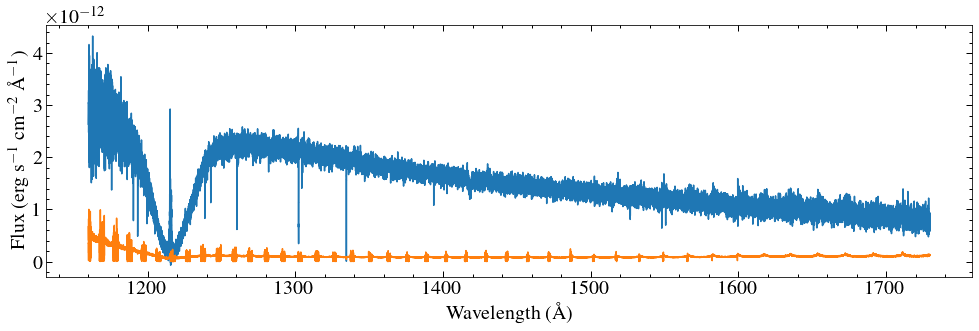

ocd856010


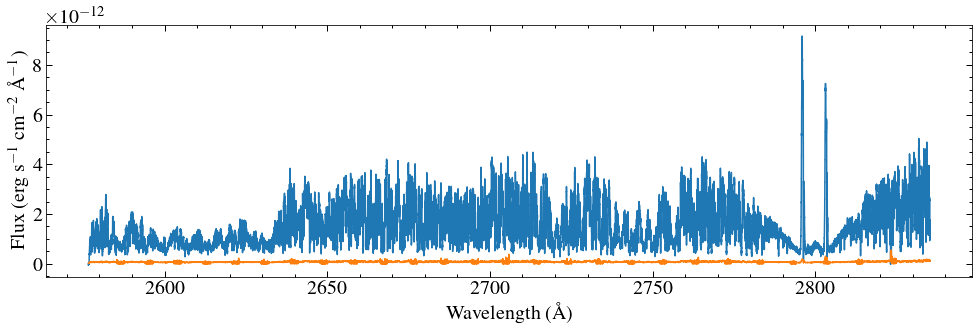

Done


In [5]:
stis_echelle_splice.splice(filepath=path, outpath=outpath, nclip=5)


Yes it does!

In [32]:
specs = glob.glob('{}*.dat'.format(outpath))
specs

['output/hd32008/ocd856010_spliced.dat',
 'output/hd32008/o8om01010_spliced.dat']

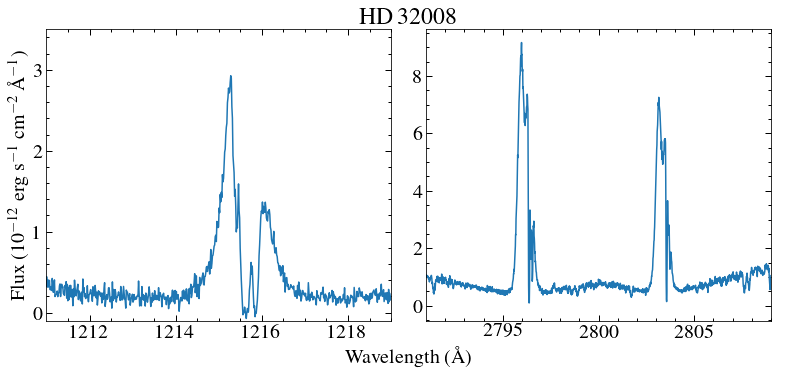

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
fscale = 1e12
for i, spec in enumerate(specs[::-1]):
    plt.subplot(1,2,i+1)
    w, f, e = np.loadtxt(spec, unpack=True)
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.plot(w,f*fscale)
    # plt.plot(w, e*fscale)
    if i == 0:
        plt.xlim(1211, 1219)
        plt.ylim(-0.1, 3.5)
        plt.ylabel('Flux (10$^{-12}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
    else:
        plt.xlim(2791, 2809)
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.xlabel('Wavelength (\AA)')
plt.title('HD\,32008')
plt.tight_layout()
# plt.subplots_adjust(hspace=0.08, wspace=0.03)


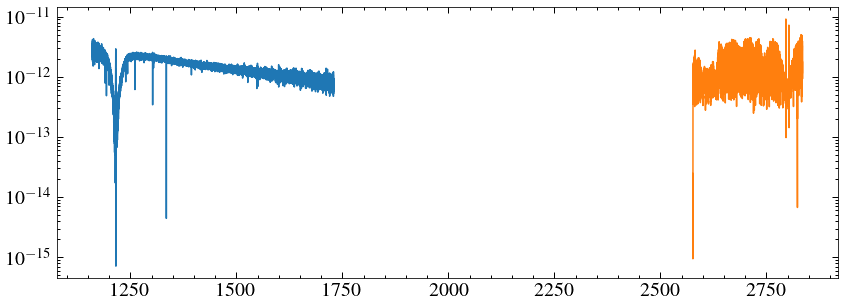

In [36]:
for i, spec in enumerate(specs[::-1]):
    # plt.subplot(1,2,i+1)
    w, f, e = np.loadtxt(spec, unpack=True)
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.plot(w[f> 0],f[f> 0])
plt.yscale('log')
# plt.xscale('log')

Could we get a period off TESS?

In [37]:
import lightkurve as lk


In [38]:
search_result = lk.search_lightcurve('HD32008')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,SPOC,120,43486732,0.0
1,TESS Sector 05,2018,TESS-SPOC,1800,43486732,0.0
2,TESS Sector 05,2018,QLP,1800,43486732,0.0
3,TESS Sector 32,2020,SPOC,120,43486732,0.0
4,TESS Sector 32,2020,TESS-SPOC,600,43486732,0.0
5,TESS Sector 32,2020,QLP,600,43486732,0.0


In [43]:
lc = search_result[0].download(download_dir='data/tess/')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

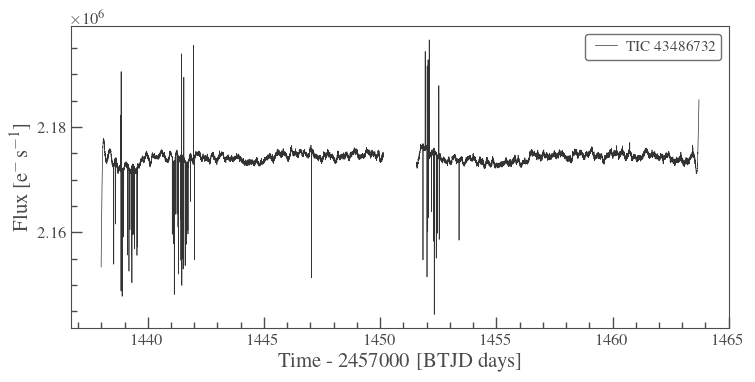

In [40]:
lc.plot()

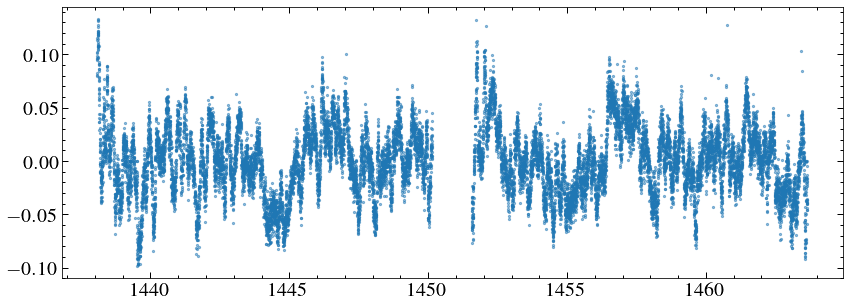

In [69]:
lcn =lc.remove_outliers(sigma=5).flatten(10001)
lcn = lcn[30:-30]
lcn = lcn.normalize('percent')
plt.scatter(lcn.time.value, lcn.flux.value-100, s=5, alpha = 0.5, rasterized=True)

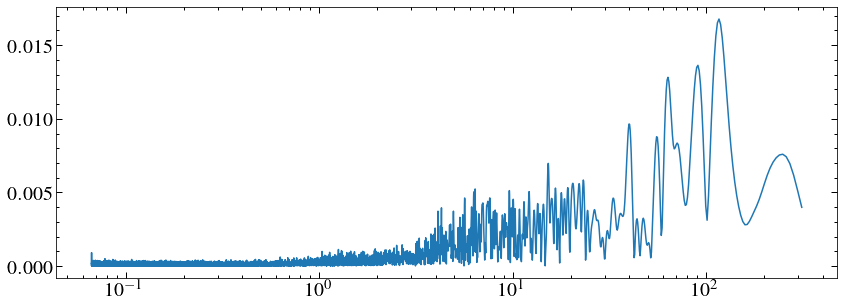

In [70]:
pg = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
plt.plot(pg.period.to(u.h), pg.power)
plt.xscale('log')

~900 day period so not going to find it in TESS.